It seems there is underfitting
Let's remove dropout rate and some changes in augmentation

In [22]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator
a = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,)

In [25]:
train=a.flow_from_directory(directory='/Users/vijay/Downloads/sports/train',
                           target_size=(224, 224), batch_size=10, class_mode='categorical')

Found 13572 images belonging to 100 classes.


In [26]:
for data_batch, labels_batch in train:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10, 100)


In [27]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
valid=valid_datagen.flow_from_directory(directory='/Users/vijay/Downloads/sports/valid',
                           target_size=(224, 224), batch_size=10, class_mode='categorical')

Found 500 images belonging to 100 classes.


In [29]:
for data_batch, labels_batch in valid:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10, 100)


In [30]:
history = model.fit(train,steps_per_epoch=150,epochs=100,validation_data=valid)

Epoch 1/100
150/150 [==============================] - 91s 601ms/step - loss: 5.0651 - accuracy: 0.0173 - val_loss: 4.5865 - val_accuracy: 0.0140
Epoch 2/100
150/150 [==============================] - 150s 999ms/step - loss: 4.5550 - accuracy: 0.0248 - val_loss: 4.4460 - val_accuracy: 0.0320
Epoch 3/100
150/150 [==============================] - 146s 968ms/step - loss: 4.4164 - accuracy: 0.0433 - val_loss: 4.2684 - val_accuracy: 0.0480
Epoch 4/100
150/150 [==============================] - 147s 978ms/step - loss: 4.1696 - accuracy: 0.0713 - val_loss: 4.1927 - val_accuracy: 0.0760
Epoch 5/100
150/150 [==============================] - 148s 983ms/step - loss: 3.9656 - accuracy: 0.0933 - val_loss: 3.8919 - val_accuracy: 0.1160
Epoch 6/100
150/150 [==============================] - 152s 1s/step - loss: 3.7901 - accuracy: 0.1166 - val_loss: 3.7300 - val_accuracy: 0.1640
Epoch 7/100
150/150 [==============================] - 151s 1s/step - loss: 3.5768 - accuracy: 0.1560 - val_loss: 4.7654 -

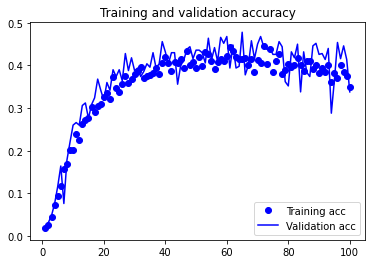

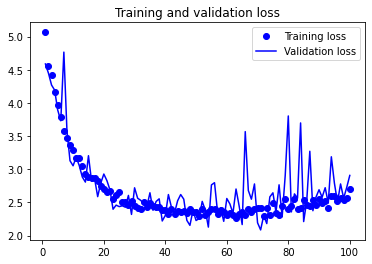

In [31]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()